# Ion Phase Space Figure

In [1]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
JtoMeV = 6.242e18/1e6
e_charge = 1.60217662e-19   

0
1
2
3
4


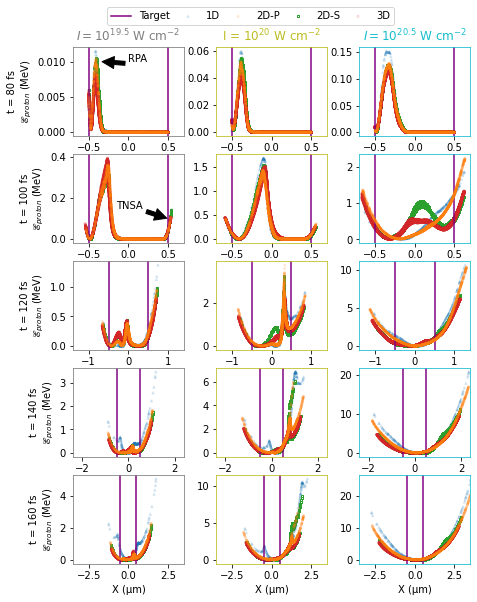

In [2]:
fig = plt.figure()
skip = 10

Intensities = np.array (['1e19.5','1e20','1e20.5']) 
labels = np.array ([r'$I = 10^{19.5}$',r'I = $10^{20}$', r'$I = 10^{20.5}$'])
Xlimits = np.array([0.7, 0.7, 1.4, 2.4, 3.5]) #Symmetric limits in x for each timestep

file_num = np.array([8,10,12,14,16]) #Timestep 80 fs, 100, fs, etc. 
fig.set_size_inches(6.69,8.2)

for j in range(len(file_num)):
    for i in range (len(Intensities)):
        ax1 = plt.subplot(len(file_num),len(Intensities),i+1+j*(len(Intensities)))
        
        file1D ='/fs/ess/PMAR0001/1D2D3D/1D/2/' + Intensities[i] +'/p%04.f.sdf'%file_num[j]
        file2DS = '/fs/ess/PMAR0001/1D2D3D/2DS/2/' + Intensities[i] +'/p%04.f.sdf'%file_num[j]
        file2DP = '/fs/ess/PMAR0001/1D2D3D/2DP/2/' + Intensities[i] +'/p%04.f.sdf'%file_num[j]
        file3D = '/fs/ess/PMAR0001/1D2D3D/3D/2/' + Intensities[i] +'/p%04.f.sdf'%file_num[j]

        data1D = sh.getdata(file1D,verbose=False)
        time =data1D.Header['time']*1e15 
        data2DS = sh.getdata(file2DS,verbose=False)
        data2DP = sh.getdata(file2DP, verbose=False)
        data3D = sh.getdata(file3D, verbose=False)
        x1D = data1D.Particles_Ek_subset_center_part_proton.grid.data[0]*1e6       
        x2DS = data2DS.Particles_Ek_subset_center_part_proton.grid.data[0]*1e6
        x2DP = data2DP.Particles_Ek_subset_center_part_proton.grid.data[0]*1e6
        x3D = data3D.Particles_Ek_subset_center_part_proton.grid.data[0]*1e6
        Energy1D = data1D.Particles_Ek_subset_center_part_proton.data*JtoMeV        
        Energy2DS = data2DS.Particles_Ek_subset_center_part_proton.data*JtoMeV
        Energy2DP = data2DP.Particles_Ek_subset_center_part_proton.data*JtoMeV
        Energy3D = data3D.Particles_Ek_subset_center_part_proton.data*JtoMeV
        plt.xlim(np.array([-1,1]) *Xlimits[j])
        size=4

        plt.scatter(x1D[::skip],Energy1D[::skip], label='1D', marker='^',facecolor="None",edgecolors='C0',alpha=0.2,s=size,)
        plt.scatter(x2DP[::skip],Energy2DP[::skip], label = "2D-P", marker='p',facecolor='None',edgecolors='C1',alpha=0.2,s=size,zorder=10)
        plt.scatter(x2DS[::skip],Energy2DS[::skip], label='2D-S', marker='s',facecolor='None',edgecolors='C2',alpha=1,s=size)
        plt.scatter(x3D[::skip],Energy3D[::skip], label='3D',facecolor='None',edgecolors='C3',alpha=0.2,s=size)#"None"

        color_axes = 'C' + str(i+7)
        [ax1.spines[side].set_color(color) for side, color in zip(['top', 'bottom', 'left', 'right'], [color_axes,color_axes,color_axes,color_axes])]
        plt.axvline(-0.5,color='purple',label='Target')
        plt.axvline(0.5,color='purple') #Draw Target
        if i ==0:
            plt.ylabel('t = ' +str(int(time)) + ' fs\n' +r'$\mathscr{E}_{proton}$ (MeV)')#, fontsize = 14
            if j==0:
                lgnd=plt.legend( loc = 'center', ncol = 5 ,labelspacing=1, bbox_to_anchor=(1.6, 1.35), columnspacing=0.8)
                ax1.annotate('RPA', xy=(-0.35, 0.01), xytext=(0.0, 0.01),arrowprops=dict(facecolor='black', shrink=0.05))               
        if j==0:
            plt.title(labels[i+j*(len(Intensities))]+ r" W cm$^{-2}$",color = 'C' + str(i+7))
        if j ==len(file_num)-1:
            plt.xlabel(u'X (\u03BCm)') #, fontsize = 14
        if (i==0 and j==1):
            ax1.annotate('TNSA', xy=(0.5, 0.1), xytext=(-0.15, 0.15),arrowprops=dict(facecolor='black', shrink=0.05))
    print(j)
    
plt.subplots_adjust(bottom=0.05, right=.975, top=.925,left=0.15,wspace=0.29)

outdir="Figure_Outputs/"
plt.savefig(outdir+'Fig6_PhaseSpace.png',dpi=600)
plt.show()